In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import random

# Reading data from the file

I have defined a function that reads the input data from the file and returns a list with the coordinates of each city.

In [2]:
def read_data(file):
    cities = []  # List to store city coordinates

    try:
        with open(file, 'r') as f:
            # Read the number of cities from the first line
            n = int(f.readline())

            # Read the x, y coordinates for each city and store them as tuples
            for _ in range(n):
                line = f.readline().strip()
                x, y = map(float, line.split())
                cities.append((x, y))
                
    except FileNotFoundError:
        print(f"File not found: {file}")
    except Exception as e:
        print(f"An error occurred: {e}")

    return cities

I have made a file sample.txt as a testcase. So let us read data from that.

In [3]:
c = read_data('sample.txt')
print(c)

[(0.060562, 0.942934), (0.394229, 0.471144), (0.937219, 0.932889), (0.243591, 0.259056), (0.33806, 0.929149), (0.245617, 0.986246), (0.58785, 0.48826), (0.771818, 0.894098), (0.741888, 0.639771), (0.009128, 0.923038), (0.054042, 0.064156), (0.289258, 0.296086), (0.319255, 0.956349), (0.805218, 0.569889), (0.213761, 0.375533), (0.128785, 0.437189), (0.381072, 0.512592), (0.42095, 0.205079), (0.814813, 0.384201), (0.502155, 0.050541), (0.709357, 0.081568), (0.574503, 0.302022), (0.039253, 0.098582), (0.100408, 0.434016), (0.834228, 0.454153), (0.242461, 0.508993), (0.675943, 0.33227), (0.726183, 0.599843), (0.13635, 0.803325), (0.231589, 0.907479), (0.93307, 0.184902), (0.646404, 0.56121), (0.537232, 0.940763), (0.958013, 0.488955), (0.196986, 0.135021), (0.740817, 0.742469), (0.478621, 0.561161), (0.183073, 0.825718), (0.134909, 0.072343), (0.188435, 0.594701)]


As seen above, we store the cities as a list which has the coordinates of each city as a tuple.

# Simulated Annealing algorithm for TSP

Implementing TSP using simulated annealing. This algorithm iteratively explores different city orders and accepts moves based on different temperatures. Also, function to calculate total distance.

In [4]:
def distance(cities, cityorder):
    total = 0
    n = len(cities)
    for i in range(n):
        city1 = cities[cityorder[i]]
        # Modulus operator ensures that the loop wraps around to the first city when i reaches the last city.
        city2 = cities[cityorder[(i + 1) % n]] 
        # x^2 + y^2 = d^2
        total += math.sqrt((city2[0] - city1[0]) ** 2 + (city2[1] - city1[1]) ** 2) 
    return total

In [27]:
def tsp(cities):
    num_cities = len(cities)
    # Initial solution: a random permutation of city indices
    current_solution = list(range(num_cities))
    best_solution = current_solution.copy()

    current_distance = distance(cities, current_solution)
    best_distance = current_distance

    # Simulated Annealing parameters
    initial_temperature = 2000
    decay_rate = 0.995
    num_iterations = 10000

    temperature = initial_temperature

    for k in range(num_iterations):
        # Randomly swap two cities in the current solution
        i, j = random.sample(range(num_cities), 2)
        new_solution = current_solution.copy()
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        new_distance = distance(cities, new_solution)
        if k==1:
            solution1 = new_distance
        delta_distance = new_distance - current_distance

        # Accept the new solution if it's better or with a certain probability if it's worse
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_solution = new_solution
            current_distance = new_distance

            # Update the best solution if needed
            if current_distance < best_distance:
                best_solution = current_solution.copy()
                best_distance = current_distance

        # Cooling schedule
        temperature *= decay_rate
    
    # Percentage improvement between first random order and best solution
    improvement = (abs(best_distance - solution1) / solution1) * 100

    return best_solution, improvement

Now let us apply the algorithm and use it on the testcase.

# Path

In [49]:
path, percent = tsp(c)
print(path)

[12, 4, 32, 8, 27, 13, 33, 24, 18, 30, 20, 19, 21, 26, 6, 31, 2, 7, 35, 36, 16, 1, 17, 11, 3, 34, 38, 10, 22, 14, 23, 15, 25, 39, 37, 28, 9, 0, 29, 5]


As seen above, we get the final order i.e. the best path as a list of indices of the original cities list. 

# Distance and Percentage Improvement

Now, let us calculate the distance using this order, which should be the best path according to our algorithm.

In [50]:
d = distance(c, path)
print(f"Total distance = {d}")
print("The percentage improvement in the path starting from a random initial point to the best possible solution is", percent)

Total distance = 6.085630070501565
The percentage improvement in the path starting from a random initial point to the best possible solution is 69.81130387002395


# Visualisation

The optimum path according is [12, 4, 32, 8, 27, 13, 33, 24, 18, 30, 20, 19, 21, 26, 6, 31, 2, 7, 35, 36, 16, 1, 17, 11, 3, 34, 38, 10, 22, 14, 23, 15, 25, 39, 37, 28, 9, 0, 29, 5]
The distance travelled by the salesman will be 6.085630070501565


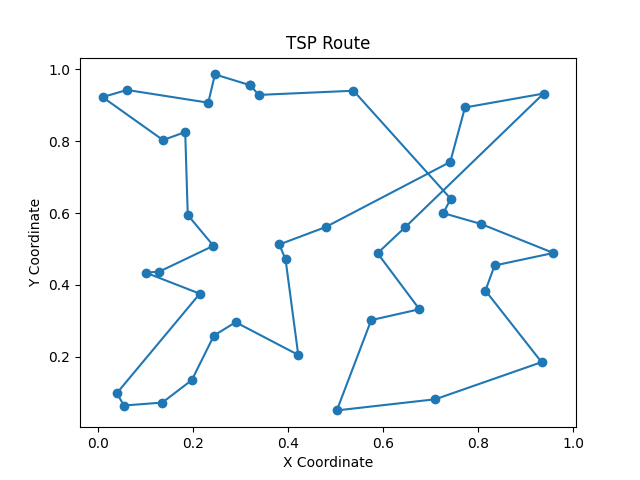

In [51]:
print("The optimum path according is", path)
print(f"The distance travelled by the salesman will be {d}")

# Rearrange city coordinates based on the final order
xplot = [c[i][0] for i in path]
yplot = [c[i][1] for i in path]

# Repeat the first city at the end to create a closed loop
xplot.append(xplot[0])
yplot.append(yplot[0])

# Create the plot
plt.clf()
plt.plot(xplot, yplot, 'o-')
plt.title("TSP Route")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()